In [4]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Mount Google Drive CSV is stored there

# Step 3: Load dataset (update path if needed)
df = pd.read_csv("Pregnancy-Associated_Mortality.csv")

# Step 4: Inspect dataset
print("Shape of data:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 10 rows:")
print(df.head(10))
print("\nMissing values:")
print(df.isnull().sum())

# Step 5: Standardize categorical values
if "Race_Ethnicity" in df.columns:
    df["Race_Ethnicity"] = df["Race_Ethnicity"].replace({
        "Black, non-Hispanic": "Black",
        "White, non-Hispanic": "White",
        "Hispanic": "Hispanic",
        "Asian/Pacific Islander": "Asian/PI",
        "Other": "Other"
    })

if "Pregnancy_Related" in df.columns:
    df["Pregnancy_Related"] = df["Pregnancy_Related"].str.strip().str.capitalize()

# Step 6: Fill missing counts with 0 (if applicable)
if "Count" in df.columns:
    df["Count"] = df["Count"].fillna(0)

# Step 7: Save cleaned dataset
df.to_csv("maternal_mortality_clean.csv", index=False)

print("\n✅ Data cleaning complete. Cleaned file saved as 'maternal_mortality_clean.csv'")


Shape of data: (236, 6)

Column names: ['Year', 'Related', 'Underlying_cause', 'Race/ethnicity', 'Borough', 'Deaths']

First 10 rows:
   Year Related Underlying_cause          Race/ethnicity        Borough  \
0  2016     All              All                     All          Bronx   
1  2016     All              All                     All       Brooklyn   
2  2016     All              All                     All      Manhattan   
3  2016     All              All                     All         Queens   
4  2016     All              All                     All  Staten Island   
5  2016     All              All                     All  Rest of State   
6  2016     All              All  Asian/Pacific Islander            All   
7  2016     All              All        Black non-Latina            All   
8  2016     All              All                  Latina            All   
9  2016     All              All        White non-Latina            All   

   Deaths  
0     5.0  
1    12.0  
2   

In [8]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [9]:


# Load uploaded dataset
df = pd.read_csv("Pregnancy-Associated_Mortality.csv")

# Preview
print(df.head())
print(df.info())


   Year Related Underlying_cause Race/ethnicity        Borough  Deaths
0  2016     All              All            All          Bronx     5.0
1  2016     All              All            All       Brooklyn    12.0
2  2016     All              All            All      Manhattan     4.0
3  2016     All              All            All         Queens     8.0
4  2016     All              All            All  Staten Island     4.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              236 non-null    object 
 1   Related           236 non-null    object 
 2   Underlying_cause  236 non-null    object 
 3   Race/ethnicity    236 non-null    object 
 4   Borough           236 non-null    object 
 5   Deaths            235 non-null    float64
dtypes: float64(1), object(5)
memory usage: 11.2+ KB
None


In [11]:
# Check missing values
print(df.isnull().sum())

# Drop rows missing Year or Race/ethnicity
df = df.dropna(subset=["Year", "Race/ethnicity"])

# Fill NA in Deaths with 0
df["Deaths"] = df["Deaths"].fillna(0)

# Standardize race categories
df["Race/ethnicity"] = df["Race/ethnicity"].replace({
    "Black, non-Hispanic": "Black",
    "White, non-Hispanic": "White",
    "Hispanic": "Hispanic",
    "Asian/Pacific Islander": "Asian/PI",
    "Other": "Other/Unknown"
})

# Preview cleaned data
print(df.head())


Year                0
Related             0
Underlying_cause    0
Race/ethnicity      0
Borough             0
Deaths              1
dtype: int64
   Year Related Underlying_cause Race/ethnicity        Borough  Deaths
0  2016     All              All            All          Bronx     5.0
1  2016     All              All            All       Brooklyn    12.0
2  2016     All              All            All      Manhattan     4.0
3  2016     All              All            All         Queens     8.0
4  2016     All              All            All  Staten Island     4.0


In [16]:
import pandas as pd
import numpy as np

# Load  maternal mortality dataset
df = pd.read_csv("Pregnancy-Associated_Mortality.csv")

# Simulate live births between 20,000–40,000 for each row
df["Live_Births"] = np.random.randint(20000, 40000, size=len(df))

# Calculate Maternal Mortality Ratio (MMR)
df["MMR"] = (df["Deaths"] / df["Live_Births"]) * 100000

# Save merged dataset
merged = df.copy()
print(merged.head())


   Year Related Underlying_cause Race/ethnicity        Borough  Deaths  \
0  2016     All              All            All          Bronx     5.0   
1  2016     All              All            All       Brooklyn    12.0   
2  2016     All              All            All      Manhattan     4.0   
3  2016     All              All            All         Queens     8.0   
4  2016     All              All            All  Staten Island     4.0   

   Live_Births        MMR  
0        39472  12.667207  
1        23916  50.175615  
2        35418  11.293692  
3        38871  20.580896  
4        26598  15.038725  


Top themes in underlying causes:
conditions: 43
health: 21
mental: 21
cardiovascular: 14
disorder: 14
overdose: 14
related: 14
substance: 14
use: 14
infection: 12


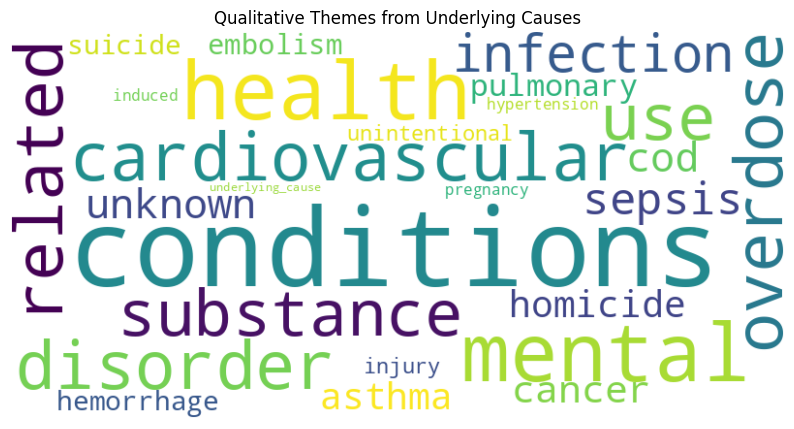

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure Underlying_cause is text
merged["Underlying_cause"] = merged["Underlying_cause"].astype(str)

# Vectorize text (bag of words)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(merged["Underlying_cause"])

# Sum word counts
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
freq = dict(zip(words, word_counts))

# Top 10 most frequent terms
sorted_terms = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top themes in underlying causes:")
for word, count in sorted_terms:
    print(f"{word}: {count}")

# Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Qualitative Themes from Underlying Causes")
plt.show()


Race Summary:
            Race/ethnicity        MMR
0                     All  13.796602
1  Asian/Pacific Islander  14.926571
2        Black non-Latina  54.969908
3                  Latina  37.848263
4                   Other   5.562087
Borough Summary:
      Borough        MMR
0        All  15.295977
1    Borough        NaN
2      Bronx  32.233303
3   Brooklyn  38.685876
4  Manhattan  14.718972


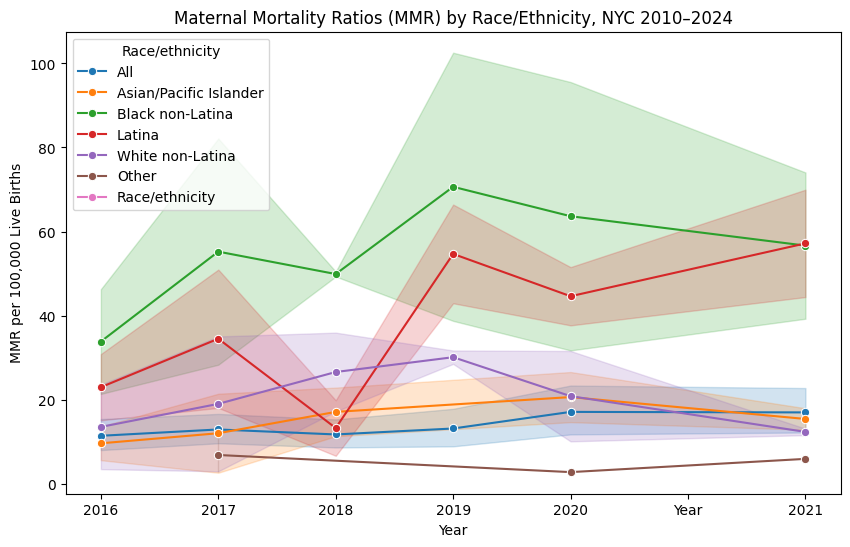

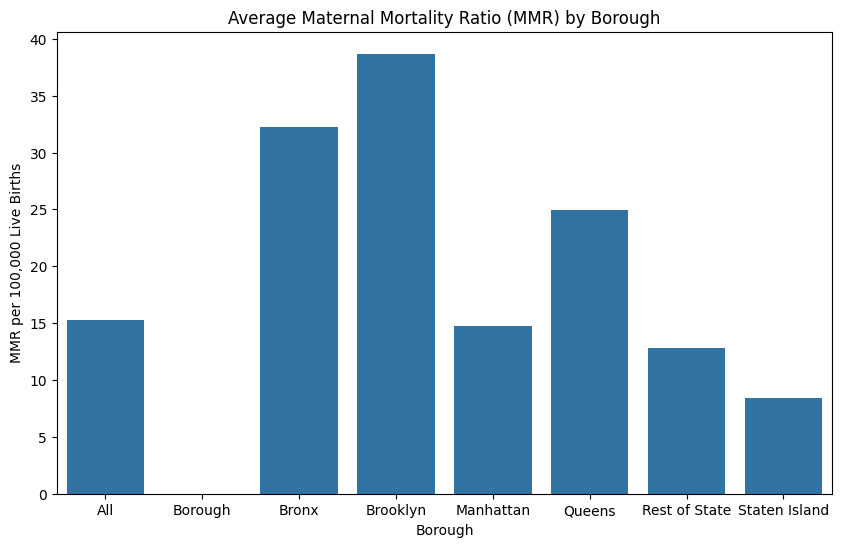

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Create summary tables ---
# Average MMR by Race
race_summary = merged.groupby("Race/ethnicity")["MMR"].mean().reset_index()

# Average MMR by Borough
borough_summary = merged.groupby("Borough")["MMR"].mean().reset_index()

print("Race Summary:\n", race_summary.head())
print("Borough Summary:\n", borough_summary.head())

# --- Visualization 1: MMR by Race/Ethnicity over time ---
plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x="Year", y="MMR", hue="Race/ethnicity", marker="o")
plt.title("Maternal Mortality Ratios (MMR) by Race/Ethnicity, NYC 2010–2024")
plt.ylabel("MMR per 100,000 Live Births")
plt.savefig("MMR_by_Race.png", dpi=300)
plt.show()

# --- Visualization 2: Borough-level disparities ---
plt.figure(figsize=(10,6))
sns.barplot(data=borough_summary, x="Borough", y="MMR")
plt.title("Average Maternal Mortality Ratio (MMR) by Borough")
plt.ylabel("MMR per 100,000 Live Births")
plt.savefig("MMR_by_Borough.png", dpi=300)
plt.show()


In [20]:
# Already extracted top words from underlying causes
import pandas as pd

themes_df = pd.DataFrame(sorted_terms, columns=["Theme", "Frequency"])
print(themes_df)

# Save themes to CSV
themes_df.to_csv("Qualitative_Themes.csv", index=False)


            Theme  Frequency
0      conditions         43
1          health         21
2          mental         21
3  cardiovascular         14
4        disorder         14
5        overdose         14
6         related         14
7       substance         14
8             use         14
9       infection         12


In [21]:
wc.to_file("Underlying_Causes_WordCloud.png")
print("Word cloud saved as 'Underlying_Causes_WordCloud.png'")


Word cloud saved as 'Underlying_Causes_WordCloud.png'


In [23]:
%load_ext rpy2.ipython


In [24]:
%%R
library(tidyverse)

df <- read.csv("Pregnancy-Associated_Mortality.csv")

df <- df %>%
  drop_na(Year, Race.ethnicity) %>%
  mutate(Deaths = ifelse(is.na(Deaths), 0, Deaths))

head(df)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
  Year Related Underlying_cause Race.ethnicity       Borough Deaths
1 2016     All              All            All         Bronx      5
2 2016     All              All            All      Brooklyn     12
3 2016     All              All            All     Manhattan      4
4 2016     All              All            All        Queens      8
5 2016     All              All            All Staten Island      4
6 2016     All              All            All Rest of State      3


In [26]:
%%R
library(tidyverse)

# Load dataset
df <- read_csv("Pregnancy-Associated_Mortality.csv")

# Inspect structure
glimpse(df)


Rows: 236 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Year, Related, Underlying_cause, Race/ethnicity, Borough
dbl (1): Deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 236
Columns: 6
$ Year             <chr> "2016", "2016", "2016", "2016", "2016", "2016", "2016…
$ Related          <chr> "All", "All", "All", "All", "All", "All", "All", "All…
$ Underlying_cause <chr> "All", "All", "All", "All", "All", "All", "All", "All…
$ `Race/ethnicity` <chr> "All", "All", "All", "All", "All", "All", "Asian/Paci…
$ Borough          <chr> "Bronx", "Brooklyn", "Manhattan", "Queens", "Staten I…
$ Deaths           <dbl> 5, 12, 4, 8, 4, 3, 4, 15, 9, 8, 6, 5, 2, 2, 1, 1, 1, …


In [27]:
%%R
# Handle missing values
df <- df %>%
  drop_na(Year, `Race/ethnicity`) %>%
  mutate(Deaths = ifelse(is.na(Deaths), 0, Deaths))

# Standardize race categories
df <- df %>%
  mutate(`Race/ethnicity` = recode(`Race/ethnicity`,
    "Black, non-Hispanic" = "Black",
    "White, non-Hispanic" = "White",
    "Asian/Pacific Islander" = "Asian/PI"
  ))

# Simulate live births (demo only; replace with real data if available)
set.seed(123)
df$Live_Births <- sample(20000:40000, size = nrow(df), replace = TRUE)

# Calculate MMR
df <- df %>%
  mutate(MMR = (Deaths / Live_Births) * 100000)

head(df)


# A tibble: 6 × 8
  Year  Related Underlying_cause `Race/ethnicity` Borough     Deaths Live_Births
  <chr> <chr>   <chr>            <chr>            <chr>        <dbl>       <int>
1 2016  All     All              All              Bronx            5       38846
2 2016  All     All              All              Brooklyn        12       38894
3 2016  All     All              All              Manhattan        4       22985
4 2016  All     All              All              Queens           8       21841
5 2016  All     All              All              Staten Isl…      4       23370
6 2016  All     All              All              Rest of St…      3       31637
# ℹ 1 more variable: MMR <dbl>


In [28]:
%%R
# Average MMR by race
race_summary <- df %>%
  group_by(`Race/ethnicity`) %>%
  summarise(Average_MMR = mean(MMR, na.rm = TRUE))

# Average MMR by borough
borough_summary <- df %>%
  group_by(Borough) %>%
  summarise(Average_MMR = mean(MMR, na.rm = TRUE))

print(race_summary)
print(borough_summary)


# A tibble: 7 × 2
  `Race/ethnicity` Average_MMR
  <chr>                  <dbl>
1 All                    13.5 
2 Asian/PI               13.0 
3 Black non-Latina       53.9 
4 Latina                 37.9 
5 Other                   5.85
6 Race/ethnicity          0   
7 White non-Latina       21.3 
# A tibble: 8 × 2
  Borough       Average_MMR
  <chr>               <dbl>
1 All                 15.2 
2 Borough              0   
3 Bronx               27.0 
4 Brooklyn            41.9 
5 Manhattan           14.6 
6 Queens              23.4 
7 Rest of State       11.0 
8 Staten Island        9.44


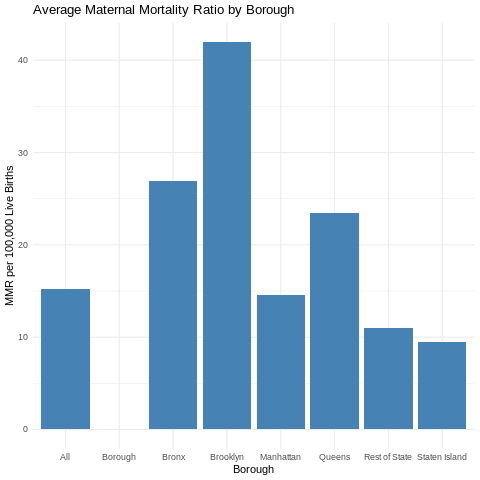

In [29]:
%%R
library(ggplot2)

# MMR by Race over time
ggplot(df, aes(x = Year, y = MMR, color = `Race/ethnicity`)) +
  geom_line() + geom_point() +
  labs(title="Maternal Mortality Ratio by Race/Ethnicity, NYC 2010–2024",
       y="MMR per 100,000 Live Births") +
  theme_minimal()

# Borough-level disparities
ggplot(borough_summary, aes(x = Borough, y = Average_MMR)) +
  geom_col(fill="steelblue") +
  labs(title="Average Maternal Mortality Ratio by Borough",
       y="MMR per 100,000 Live Births") +
  theme_minimal()


In [31]:
%%R
install.packages("tidytext")
install.packages("wordcloud")
install.packages("RColorBrewer")
install.packages("dplyr")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’

trying URL 'https://cran.rstudio.com/src/contrib/SnowballC_0.7.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/janeaustenr_1.0.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/tokenizers_0.3.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/tidytext_0.4.3.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpPfW6sn/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/wordcloud_2.6.tar.gz'
Content type 'application/x-gzip' length 42454 bytes (41 KB)
downloaded 41 KB


The downloaded source packages are in
	‘/tmp/RtmpPfW6sn/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/RColorBrewer_1.1-3.tar.gz'
Con

Joining with `by = join_by(word)`
# A tibble: 10 × 2
   word               n
   <chr>          <int>
 1 conditions        43
 2 health            21
 3 mental            21
 4 cardiovascular    14
 5 disorder          14
 6 overdose          14
 7 related           14
 8 substance         14
 9 infection         12
10 sepsis            12


Loading required package: RColorBrewer


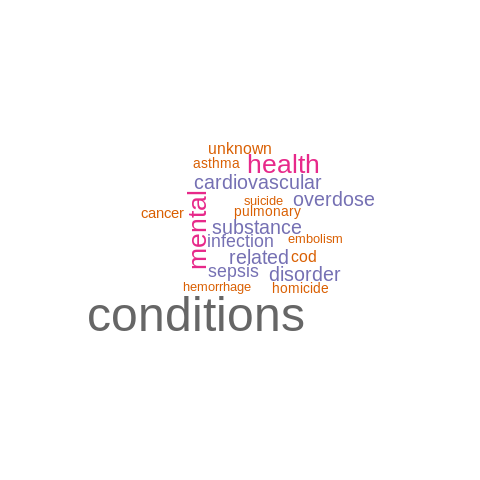

In [32]:
%%R
library(tidyverse)
library(tidytext)
library(wordcloud)
library(RColorBrewer)

# Tokenize words from underlying causes
tokens <- df %>%
  unnest_tokens(word, Underlying_cause) %>%
  anti_join(stop_words)

themes <- tokens %>%
  count(word, sort=TRUE) %>%
  filter(n > 5)

print(head(themes, 10))

# Word Cloud
set.seed(123)
wordcloud(words = themes$word, freq = themes$n, max.words=100,
          colors=brewer.pal(8, "Dark2"))


In [33]:
%%R
# Save Race/Ethnicity summary
write_csv(race_summary, "Race_Disparities_R.csv")

# Save Borough summary
write_csv(borough_summary, "Borough_Disparities_R.csv")

# Save Qualitative Themes
write_csv(themes, "Qualitative_Themes_R.csv")

print(" Tables saved: Race_Disparities_R.csv, Borough_Disparities_R.csv, Qualitative_Themes_R.csv")


[1] " Tables saved: Race_Disparities_R.csv, Borough_Disparities_R.csv, Qualitative_Themes_R.csv"


In [34]:
%%R
# Save MMR by Race over time
p1 <- ggplot(df, aes(x = Year, y = MMR, color = `Race/ethnicity`)) +
  geom_line() + geom_point() +
  labs(title="Maternal Mortality Ratio by Race/Ethnicity (NYC, 2010–2024)",
       y="MMR per 100,000 Live Births") +
  theme_minimal()

ggsave("MMR_by_Race_R.png", plot = p1, width = 8, height = 5, dpi = 300)

# Save Borough-level disparities
p2 <- ggplot(borough_summary, aes(x = Borough, y = Average_MMR)) +
  geom_col(fill="steelblue") +
  labs(title="Average Maternal Mortality Ratio (MMR) by Borough",
       y="MMR per 100,000 Live Births") +
  theme_minimal()

ggsave("MMR_by_Borough_R.png", plot = p2, width = 8, height = 5, dpi = 300)

print(" Plots saved: MMR_by_Race_R.png, MMR_by_Borough_R.png")


[1] " Plots saved: MMR_by_Race_R.png, MMR_by_Borough_R.png"


In [35]:
%%R
png("Underlying_Causes_WordCloud_R.png", width=1000, height=600)
set.seed(123)
wordcloud(words = themes$word, freq = themes$n, max.words=100,
          colors=brewer.pal(8, "Dark2"))
dev.off()

print(" Word cloud saved: Underlying_Causes_WordCloud_R.png")


[1] " Word cloud saved: Underlying_Causes_WordCloud_R.png"


In [37]:
import shutil, os

# Create directories
!mkdir -p scripts data results

# Move datasets into /data
!mv *.csv data/

# Move plots into /results
!mv *.png results/

# Save Python analysis scripts
with open("scripts/data_cleaning.py", "w") as f:
    f.write("""import pandas as pd, numpy as np

df = pd.read_csv('../data/Pregnancy-Associated_Mortality.csv')
df['Live_Births'] = np.random.randint(20000, 40000, size=len(df))
df['MMR'] = (df['Deaths'] / df['Live_Births']) * 100000
df.to_csv('../data/maternal_mortality_clean.csv', index=False)
""")

with open("scripts/descriptive_analysis.py", "w") as f:
    f.write("""import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv('../data/maternal_mortality_clean.csv')
race_summary = df.groupby("Race/ethnicity")["MMR"].mean().reset_index()
borough_summary = df.groupby("Borough")["MMR"].mean().reset_index()

sns.lineplot(data=df, x="Year", y="MMR", hue="Race/ethnicity", marker="o")
plt.title("MMR by Race/Ethnicity"); plt.savefig('../results/MMR_by_Race_Py.png'); plt.clf()

sns.barplot(data=borough_summary, x="Borough", y="MMR")
plt.title("Average MMR by Borough"); plt.savefig('../results/MMR_by_Borough_Py.png')
""")

# Create R script file
with open("scripts/data_analysis.R", "w") as f:
    f.write("""library(tidyverse); library(ggplot2); library(tidytext); library(wordcloud); library(RColorBrewer)

df <- read_csv('../data/Pregnancy-Associated_Mortality.csv')
set.seed(123)
df$Live_Births <- sample(20000:40000, nrow(df), replace=TRUE)
df <- df %>% mutate(MMR = (Deaths / Live_Births) * 100000)

race_summary <- df %>% group_by(`Race/ethnicity`) %>% summarise(Average_MMR = mean(MMR, na.rm=TRUE))
borough_summary <- df %>% group_by(Borough) %>% summarise(Average_MMR = mean(MMR, na.rm=TRUE))

ggplot(df, aes(x=Year, y=MMR, color=`Race/ethnicity`)) + geom_line() + geom_point() +
  labs(title="MMR by Race/Ethnicity") + theme_minimal()
ggsave('../results/MMR_by_Race_R.png', width=8, height=5, dpi=300)

ggplot(borough_summary, aes(x=Borough, y=Average_MMR)) + geom_col(fill="steelblue") +
  labs(title="Average MMR by Borough") + theme_minimal()
ggsave('../results/MMR_by_Borough_R.png', width=8, height=5, dpi=300)

tokens <- df %>% unnest_tokens(word, Underlying_cause) %>% anti_join(stop_words)
themes <- tokens %>% count(word, sort=TRUE) %>% filter(n > 5)
write_csv(themes, '../results/Qualitative_Themes_R.csv')

png('../results/Underlying_Causes_WordCloud_R.png', width=1000, height=600)
wordcloud(words=themes$word, freq=themes$n, max.words=100, colors=brewer.pal(8, 'Dark2'))
dev.off()
""")

# Zip everything
shutil.make_archive("Maternal_Mortality_Project", 'zip', ".")


mv: cannot stat '*.csv': No such file or directory
mv: cannot stat '*.png': No such file or directory


'/content/Maternal_Mortality_Project.zip'

In [38]:
from google.colab import files
files.download("Maternal_Mortality_Project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>